In [1]:
import os.path as osp
import os
import matplotlib.pylab as plt
from tf_lab.icml.ae_farm_helper import relevant_class

In [2]:
%matplotlib inline

In [3]:
top_in_dir = '/orions4-zfs/projects/lins2/Panos_Space/DATA/OUT/icml/synthetic_point_clouds/'

ae_loss = 'emd'
wgan_gp_experiments = False

if wgan_gp_experiments:
    prefix = 'nb_wgan_gp_ae_'    
else:
    prefix = 'nb_gan_ae_'
    
experiments_names = [name for name in os.listdir(top_in_dir) if (prefix in name) and (ae_loss in name)]
experiments_dir = [osp.join(top_in_dir, name) for name in experiments_names]

stats_holder = relevant_class(ae_loss)
print experiments_names

['nb_gan_ae_14_emd_chair_2048_best_epoch', 'nb_gan_ae_12_emd_chair_2048_max_min_epoch', 'nb_gan_ae_12_emd_chair_2048_best_epoch', 'nb_gan_ae_13_emd_chair_2048_max_min_epoch', 'nb_gan_ae_11_emd_chair_2048_best_epoch', 'nb_gan_ae_10_emd_chair_2048_max_min_epoch', 'nb_gan_ae_11_emd_chair_2048_max_min_epoch', 'nb_gan_ae_15_emd_chair_2048_best_epoch', 'nb_gan_ae_16_emd_chair_2048_best_epoch', 'nb_gan_ae_13_emd_chair_2048_best_epoch', 'nb_gan_ae_10_emd_chair_2048_best_epoch', 'nb_gan_ae_14_emd_chair_2048_max_min_epoch']


In [4]:
ae_name_to_id = lambda ae_name: int(ae_name[len(prefix):len(prefix)+2])
epochs_used = [1, 3, 10, 30, 100, 300, 400, 500]

In [8]:
best_exp

{16: [0.109333,
  0.067552,
  0.012347,
  0.012324,
  0.00842,
  0.00836,
  0.012344,
  0.012133],
 32: [0.056437,
  0.059099,
  0.018321,
  0.01842,
  0.01184,
  0.013979,
  0.01905,
  0.023923],
 64: [0.067347,
  0.068081,
  0.02525,
  0.016018,
  0.012675,
  0.011411,
  0.012745,
  0.014091],
 128: [0.06723,
  0.071286,
  0.046175,
  0.020338,
  0.013435,
  0.011707,
  0.015605,
  0.017805],
 256: [0.078731,
  0.081234,
  0.096707,
  0.027017,
  0.013631,
  0.012255,
  0.010969,
  0.010522],
 512: [0.117434,
  0.104682,
  0.11001,
  0.056389,
  0.018481,
  0.008981,
  0.011771,
  0.016042],
 1024: [0.12705,
  0.10695,
  0.13284,
  0.118119,
  0.025054,
  0.012644,
  0.01812,
  0.019821]}

In [5]:
best_exp = dict()
min_max_exp = dict()
for ex_dir, ex_name in zip(experiments_dir, experiments_names):
    
    ex_id = ae_name_to_id(ex_name)
    bneck = stats_holder.experiment_id_to_bneck[ex_id]
    jsd_file = osp.join(ex_dir, 'jsd_stats.txt')
    
    d = min_max_exp
    if 'best' in ex_name:
        d = best_exp
    else:
        continue
        
    d[bneck] = []
        
    with open(jsd_file, 'r') as fin:        
        fin.readline () # first line is comment.
        for line in fin:
            meas = float(line.rstrip().split(' ')[2])
            d[bneck].append(meas)

In [6]:
d = best_exp
keys = sorted(d.keys())
for bneck in keys:
    print bneck, min(best_exp[bneck]), min(min_max_exp[bneck])

16 0.00836

KeyError: 16

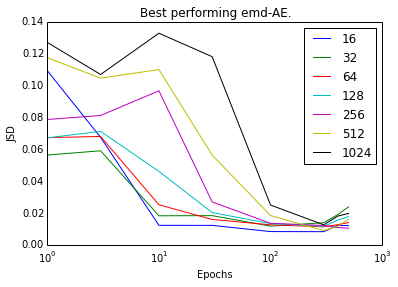

In [12]:
keys = sorted(best_exp.keys())
for bneck in keys:
    plt.semilogx(epochs_used, best_exp[bneck])
#     plt.plot(epochs_used, best_exp[bneck])
    
plt.legend(keys)
plt.title('Best performing %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')

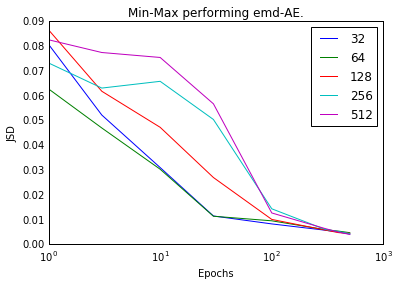

In [7]:
keys = sorted(min_max_exp.keys())
for bneck in keys:
    plt.semilogx(epochs_used, min_max_exp[bneck])
    
plt.legend(keys)
plt.title('Min-Max performing %s-AE.' % (ae_loss,))
plt.ylabel('JSD')
plt.xlabel('Epochs')
plt.tick_params(axis='x', which='both', bottom='off', top='off')
plt.tick_params(axis='y', which='both', left='off', right='off')